In [1]:
import os
from os import walk

import pandas as pd
import numpy as np
import sys
import re

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter

%matplotlib inline

pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 1500)
pd.set_option('max_colwidth', 400)

from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:70% !important; }</style>"))

#Set seaborn color palette:
my_pal = {'Kourami' : sns.color_palette("tab10")[0], 'HLA-LA' : sns.color_palette("tab10")[1], 'Optitype' : sns.color_palette("tab10")[2], 'Hisatgenotype' : sns.color_palette("tab10")[3], 'STC-seq' : sns.color_palette("tab10")[4], 'Full Dataset' : sns.color_palette("tab10")[5]} 

In [2]:
main_folder_path = 'C:\\Users\\nikol\\OneDrive\\DTU\\11_semester\\'

resultpath = main_folder_path + 'output_full_dataset\\'

gold_standard_path = main_folder_path + 'gold_standard_data\\'

In [3]:
#Chose allele resolution: options: "one_field", two_field" or "p_group" or "e_group"
resolution = "two_field"

In [4]:
if resolution == "one_field":
    resolution_text = "1-field"
elif resolution == "two_field":
    resolution_text = "2-field"
elif resolution == "p_group":
    resolution_text = "P group"
elif resolution == "e_group":
    resolution_text = "NetMHCpan"

# Load result dataframes

In [5]:
results_df = pd.read_pickle(main_folder_path + "result_dataframes\\" + resolution + "_results_df.pkl")

errors_metadata_hla_I_df = pd.read_pickle(main_folder_path + "result_dataframes\\" + resolution + "_errors_metadata_hla_I_df.pkl")

errors_metadata_hla_II_df = pd.read_pickle(main_folder_path + "result_dataframes\\" + resolution + "_errors_metadata_hla_II_df.pkl")

In [6]:
results_df

Tool    Kourami                            HLA-LA                           \
Metric    score   count call_rate accuracy  score count call_rate accuracy   
A        1420.0  1600.0     96.50    85.65   1538  1658     100.0    92.76   
B        1296.0  1432.0     86.37    78.17   1619  1658     100.0    97.65   
C        1361.0  1500.0     90.47    82.09   1603  1658     100.0    96.68   
DRB1     1591.0  1648.0     99.40    95.96   1616  1658     100.0    97.47   
DQB1     1226.0  1388.0     83.72    73.94   1559  1658     100.0    94.03   
HLA-I    4077.0  4532.0     91.11    81.97   4760  4974     100.0    95.70   
HLA-II   2817.0  3036.0     91.56    84.95   3175  3316     100.0    95.75   
Evaxion  5668.0  6180.0     93.18    85.46   6376  6632     100.0    96.14   
Total    6894.0  7568.0     91.29    83.16   7935  8290     100.0    95.72   

Tool    Optitype                            Hisatgenotype                    \
Metric     score   count call_rate accuracy         score   count call_rate   
A         1640.0  1658.0     100.0    98.91        1343.0  1658.0     100.0   
B         1623.0  1658.0     100.0    97.89        1541.0  1658.0     100.0   
C         1634.0  1658.0     100.0    98.55        1538.0  1658.0     100.0   
DRB1         0.0     0.0       0.0     0.00        1466.0  1658.0     100.0   
DQB1         0.0     0.0       0.0     0.00        1474.0  1658.0     100.0   
HLA-I     4897.0  4974.0     100.0    98.45        4422.0  4974.0     100.0   
HLA-II       0.0     0.0       0.0     0.00        2940.0  3316.0     100.0   
Evaxion   4897.0  4974.0      75.0    73.84        5888.0  6632.0     100.0   
Total     4897.0  4974.0      60.0    59.07        7362.0  8290.0     100.0   

Tool             STC-seq                            ensemble_all          \
Metric  accuracy   score   count call_rate accuracy        score   count   
A          81.00   843.0  1162.0     70.08    50.84       1581.0  1658.0   
B          92.94   769.0  1180.0     71.17    46.38       1607.0  1658.0   
C          92.76   738.0  1126.0     67.91    44.51       1600.0  1658.0   
DRB1       88.42  1033.0  1280.0     77.20    62.30       1605.0  1658.0   
DQB1       88.90   783.0   960.0     57.90    47.23       1443.0  1658.0   
HLA-I      88.90  2350.0  3468.0     69.72    47.25       4788.0  4974.0   
HLA-II     88.66  1816.0  2240.0     67.55    54.76       3048.0  3316.0   
Evaxion    88.78  3383.0  4748.0     71.59    51.01       6393.0  6632.0   
Total      88.81  4166.0  5708.0     68.85    50.25       7836.0  8290.0   

Tool                       ensemble_graph                            Total  
Metric  call_rate accuracy          score   count call_rate accuracy count  
A           100.0    95.36         1489.0  1658.0     100.0    89.81  1658  
B           100.0    96.92         1581.0  1658.0     100.0    95.36  1658  
C           100.0    96.50         1565.0  1658.0     100.0    94.39  1658  
DRB1        100.0    96.80         1605.0  1658.0     100.0    96.80  1658  
DQB1        100.0    87.03         1448.0  1658.0     100.0    87.33  1658  
HLA-I       100.0    96.26         4635.0  4974.0     100.0    93.18  4974  
HLA-II      100.0    91.92         3053.0  3316.0     100.0    92.07  3316  
Evaxion     100.0    96.40         6240.0  6632.0     100.0    94.09  6632  
Total       100.0    94.52         7688.0  8290.0     100.0    92.74  8290

# Analysis of Errors in relation to sequencing depth

In [7]:
labels = ['Kourami', 'HLA-LA', 'Optitype', 'Hisatgenotype', 'STC-seq', 'ensemble_all', 'ensemble_graph']

In [8]:
kourami_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
optitype_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
hla_la_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
hisatgenotype_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
stc_seq_length_dist_df = pd.DataFrame(columns = ['mean_depth'])

for sample_id in list(errors_metadata_hla_I_df.index): 
    #Kourami
    n_errors = errors_metadata_hla_I_df.loc[sample_id, 'Kourami']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_I_df.loc[sample_id, 'mean_depth']
            kourami_length_dist_df = kourami_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)
    
    #Optitype
    n_errors = errors_metadata_hla_I_df.loc[sample_id, 'Optitype']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_I_df.loc[sample_id, 'mean_depth']
            optitype_length_dist_df = optitype_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)
            
    #HLA-LA
    n_errors = errors_metadata_hla_I_df.loc[sample_id, 'HLA-LA']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_I_df.loc[sample_id, 'mean_depth']
            hla_la_length_dist_df = hla_la_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)

    #Hisatgenotype
    n_errors = errors_metadata_hla_I_df.loc[sample_id, 'Hisatgenotype']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_I_df.loc[sample_id, 'mean_depth']
            hisatgenotype_length_dist_df = hisatgenotype_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)

    #STC-seq
    n_errors = errors_metadata_hla_I_df.loc[sample_id, 'STC-seq']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_I_df.loc[sample_id, 'mean_depth']
            stc_seq_length_dist_df = stc_seq_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)


In [9]:
labels_boxplot_hla_I =  labels[:-2] + ['Full Dataset']

overall_coverage = errors_metadata_hla_I_df['mean_depth'].values
kourami_coverage = kourami_length_dist_df['mean_depth'].values
optitype_coverage = optitype_length_dist_df['mean_depth'].values
hla_la_coverage= hla_la_length_dist_df['mean_depth'].values
hisatgenotype_coverage = hisatgenotype_length_dist_df['mean_depth'].values
stc_seq_coverage = stc_seq_length_dist_df['mean_depth'].values
coverage_dict = {'Kourami' : kourami_coverage, 'HLA-LA' : hla_la_coverage, 'Optitype' : optitype_coverage, 'Hisatgenotype' : hisatgenotype_coverage, 'STC-seq' : stc_seq_coverage, 'Full Dataset' : overall_coverage} 

In [10]:
#Create pandas df from coverage data with one entry per mistake, not one per sample
#e.g. several entries can originate from the same sample, if multiple mistakes are made at e.g. allele A.1 and B.2

coverage_dict_hla_I = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in coverage_dict.items() ]))

coverage_dict_hla_I_wide = pd.melt(coverage_dict_hla_I, var_name='tool', value_name='Coverage').dropna().reset_index(drop = True)

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


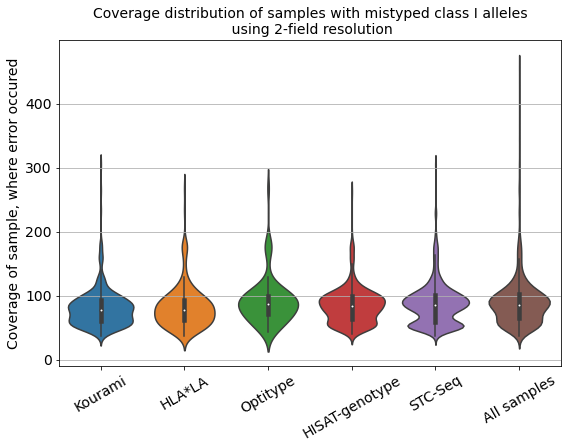

In [59]:
# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'Coverage', data=coverage_dict_hla_I_wide, palette = my_pal, ax = ax)

plt.title("Coverage distribution of samples with mistyped class I alleles\n using " + resolution_text + " resolution", size=14 )
plt.ylabel('Coverage of sample, where error occured', size=14)
ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-Seq', 'All samples'], rotation=30, size = 14)
plt.xlabel('')
ax.yaxis.grid()
plt.yticks(fontsize=14)




plt.show()

# Same analysis - now for HLA-II

In [12]:
kourami_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
optitype_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
hla_la_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
hisatgenotype_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
stc_seq_length_dist_df = pd.DataFrame(columns = ['mean_depth'])

for sample_id in list(errors_metadata_hla_II_df.index): 
    #Kourami
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'Kourami']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            kourami_length_dist_df = kourami_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)
    
    #HLA-LA
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'HLA-LA']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            hla_la_length_dist_df = hla_la_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)

    #Hisatgenotype
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'Hisatgenotype']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            hisatgenotype_length_dist_df = hisatgenotype_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)

    #STC-seq
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'STC-seq']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            stc_seq_length_dist_df = stc_seq_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)


In [13]:
overall_coverage = errors_metadata_hla_II_df['mean_depth'].values
kourami_coverage = kourami_length_dist_df['mean_depth'].values
hla_la_coverage= hla_la_length_dist_df['mean_depth'].values
hisatgenotype_coverage = hisatgenotype_length_dist_df['mean_depth'].values
stc_seq_coverage = stc_seq_length_dist_df['mean_depth'].values
coverage_dict = {'Kourami' : kourami_coverage, 'HLA-LA' : hla_la_coverage, 'Hisatgenotype' : hisatgenotype_coverage, 'STC-seq' : stc_seq_coverage, 'Full Dataset' : overall_coverage}   

In [14]:
#Create pandas df from coverage data with one entry per mistake, not one per sample
#e.g. several entries can originate from the same sample, if multiple mistakes are made at e.g. allele A.1 and B.2

coverage_dict_hla_II = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in coverage_dict.items() ]))

coverage_dict_hla_II_wide = pd.melt(coverage_dict_hla_II, var_name='tool', value_name='Coverage').dropna().reset_index(drop = True)

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


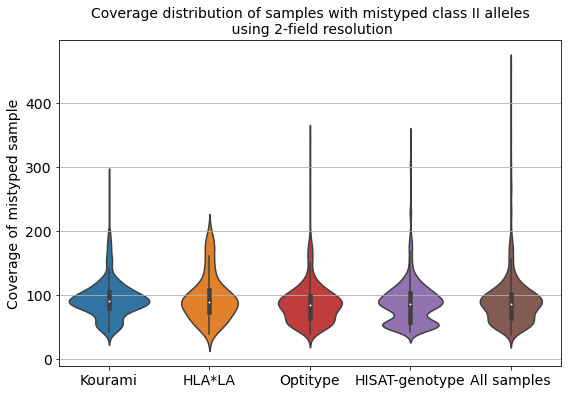

In [61]:
# load data into a dataframe
fontsize = 14


fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'Coverage', data=coverage_dict_hla_II_wide, palette = my_pal, ax = ax)

plt.title("Coverage distribution of samples with mistyped class II alleles\n using " + resolution_text + " resolution", size =14 )
plt.ylabel('Coverage of mistyped sample', size=14)
plt.xlabel('')
ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'All samples'], size = 14)
plt.yticks(fontsize=14)


ax.yaxis.grid()

plt.show()

# Analysis of overlap of samples 
Is there an overlap between the samples used in this study and the samples used in the development of the individual tools.

In [16]:
len(list(errors_metadata_hla_I_df.index))

829

In [62]:
sample_library_filepath = 'C:\\Users\\nikol\\OneDrive\\DTU\\11_semester\\sample_overlap_data\\'

samples_used_in_tools_dict = dict()

for tool in ['kourami', 'hla-la', 'optitype', 'hisatgenotype']:
    full_filepath = sample_library_filepath + tool + "_samples.txt"
    
    tmp_list = list()
    
    #Read all lines with samples used in study
    with open(full_filepath, 'r') as infile:
        for line in infile:
            
            tmp_list.append(line[:-1])
    
    
    #Only include those, which are also included in the 819 samples in this study:
    filtered_tmp_list = list(set((list(errors_metadata_hla_I_df.index))) & set(tmp_list))
    
    samples_used_in_tools_dict[tool] = len(list(filtered_tmp_list))
        

In [63]:
already_used_samples_df = pd.DataFrame(samples_used_in_tools_dict, index=['n_samples'])
already_used_samples_df

,kourami,hla-la,optitype,hisatgenotype
n_samples,31,28,95,0


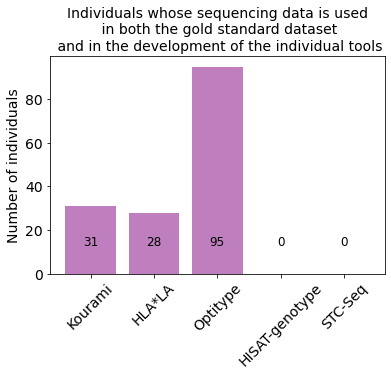

In [64]:
#Define number of overlapping samples. Include 0 for STC-Seq
overlapping_samples_list = list(already_used_samples_df.values[0]) + [0]


fig, ax = plt.subplots(figsize=(6,4))

bars = ax.bar(range(0,5), overlapping_samples_list, align='center', alpha=0.5, color = 'purple')


ax.set_ylabel('Number of individuals', size = 14)
ax.set_title('Individuals whose sequencing data is used\n in both the gold standard dataset\n and in the development of the individual tools', size = 14)
ax.set_xticks(range(0,5))
ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-Seq'], rotation = 45, size = 14)

plt.yticks(fontsize=14)

def autolabel(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, 10),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
                    color="black", size = 12, weight = 400)


autolabel(bars)


## Abandoned analyses of correlations between mistyping and e.g. gender or rac and mistyping

In [20]:
errors_metadata_hla_I_df

,mean_depth,Kourami,HLA-LA,Optitype,Hisatgenotype,STC-seq,Kourami_ambiguous,ensemble_all,ensemble_graph,Region,Population,Population Description,Gender,Center,mean_error_graph
HG00096,173.04,0,0,0,0,4,0,0,0,EUR,GBR,British in England and Scotland,male,WUGSC,0.000000
HG00097,57.83,2,1,0,0,0,2,0,0,EUR,GBR,British in England and Scotland,female,BCM,1.000000
HG00099,79.76,6,2,0,2,5,6,1,3,EUR,GBR,British in England and Scotland,female,BCM,3.333333
HG00100,84.79,1,0,0,1,6,1,1,1,EUR,GBR,British in England and Scotland,female,BI,0.666667
HG00101,112.47,1,1,0,0,2,1,1,1,EUR,GBR,British in England and Scotland,male,WUGSC,0.666667
HG00102,82.33,1,0,0,1,2,1,1,1,EUR,GBR,British in England and Scotland,female,WUGSC,0.666667
HG00103,83.25,1,0,0,0,2,1,0,0,EUR,GBR,British in England and Scotland,male,WUGSC,0.333333
HG00104,71.49,2,0,0,0,0,2,0,0,EUR,GBR,British in England and Scotland,female,NaN,0.666667
HG00105,59.84,4,0,0,0,1,4,0,0,EUR,GBR,British in England and Scotland,male,BCM,1.333333
HG00106,63.69,2,0,0,0,3,2,0,0,EUR,GBR,British in England and Scotland,female,BCM,0.666667


In [21]:
list(errors_metadata_hla_I_df.columns[1:6])

['Kourami', 'HLA-LA', 'Optitype', 'Hisatgenotype', 'STC-seq']

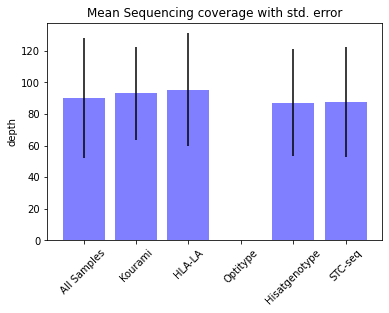

In [22]:
overall_mean = errors_metadata_hla_I_df['mean_depth'].mean()
kourami_mean = kourami_length_dist_df['mean_depth'].mean()
optitype_mean = optitype_length_dist_df['mean_depth'].mean()
hla_la_mean = hla_la_length_dist_df['mean_depth'].mean()
hisatgenotype_mean = hisatgenotype_length_dist_df['mean_depth'].mean()
stc_seq_mean = stc_seq_length_dist_df['mean_depth'].mean()

mean_values = [overall_mean, kourami_mean, hla_la_mean, optitype_mean, hisatgenotype_mean, stc_seq_mean]

overall_std = errors_metadata_hla_I_df['mean_depth'].std()
kourami_std = kourami_length_dist_df['mean_depth'].std()
optitype_std = optitype_length_dist_df['mean_depth'].std()
hla_la_std = hla_la_length_dist_df['mean_depth'].std()
hisatgenotype_std = hisatgenotype_length_dist_df['mean_depth'].std()
stc_seq_std = stc_seq_length_dist_df['mean_depth'].std()

std_values = [overall_std, kourami_std, hla_la_std, optitype_std, hisatgenotype_std, stc_seq_std]

plt.bar(range(6), mean_values, 
        yerr=std_values, align='center', alpha=0.5, color = '#0000FF')

plt.xticks(range(6), ['All Samples'] + list(errors_metadata_hla_I_df.columns[1:6]), rotation = 45)
plt.ylabel('depth')
plt.title('Mean Sequencing coverage with std. error')
plt.show()

Text(0, 0.5, 'mean coverage')

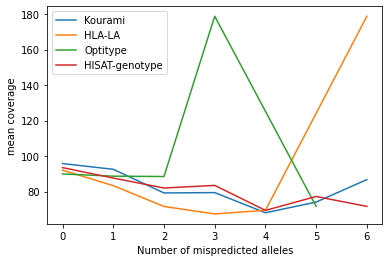

In [23]:
#Plot of mean depth as a function of mean errors of HLA-LA, HISAT-genotype and Kourami. (in jumps of 1/3)
ax = errors_metadata_hla_I_df.groupby('Kourami')['mean_depth'].mean().plot()
errors_metadata_hla_I_df.groupby('HLA-LA')['mean_depth'].mean().plot(ax = ax)
errors_metadata_hla_I_df.groupby('Optitype')['mean_depth'].mean().plot(ax = ax)
errors_metadata_hla_I_df.groupby('Hisatgenotype')['mean_depth'].mean().plot(ax = ax)

ax.legend(['Kourami', 'HLA-LA', 'Optitype', 'HISAT-genotype'])

ax.set_xlabel('Number of mispredicted alleles')
ax.set_ylabel('mean coverage')

In [24]:
coverage_dict_hla_II_wide

,tool,Coverage
0,Kourami,63.69
1,Kourami,109.73
2,Kourami,109.73
3,Kourami,110.25
4,Kourami,107.51
5,Kourami,107.51
6,Kourami,94.47
7,Kourami,94.47
8,Kourami,87.76
9,Kourami,87.76


# The same analysis - now for HLA-II

In [25]:
kourami_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
optitype_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
hla_la_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
hisatgenotype_length_dist_df = pd.DataFrame(columns = ['mean_depth'])
stc_seq_length_dist_df = pd.DataFrame(columns = ['mean_depth'])

for sample_id in list(errors_metadata_hla_II_df.index): 
    #Kourami
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'Kourami']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            kourami_length_dist_df = kourami_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)
    
    #HLA-LA
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'HLA-LA']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            hla_la_length_dist_df = hla_la_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)

    #Hisatgenotype
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'Hisatgenotype']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            hisatgenotype_length_dist_df = hisatgenotype_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)

    #STC-seq
    n_errors = errors_metadata_hla_II_df.loc[sample_id, 'STC-seq']
    if n_errors > 0:
        for n in range(n_errors):
            depth_of_error_sample = errors_metadata_hla_II_df.loc[sample_id, 'mean_depth']
            stc_seq_length_dist_df = stc_seq_length_dist_df.append({'mean_depth' : depth_of_error_sample}, ignore_index=True)


(0.0, 466.34)

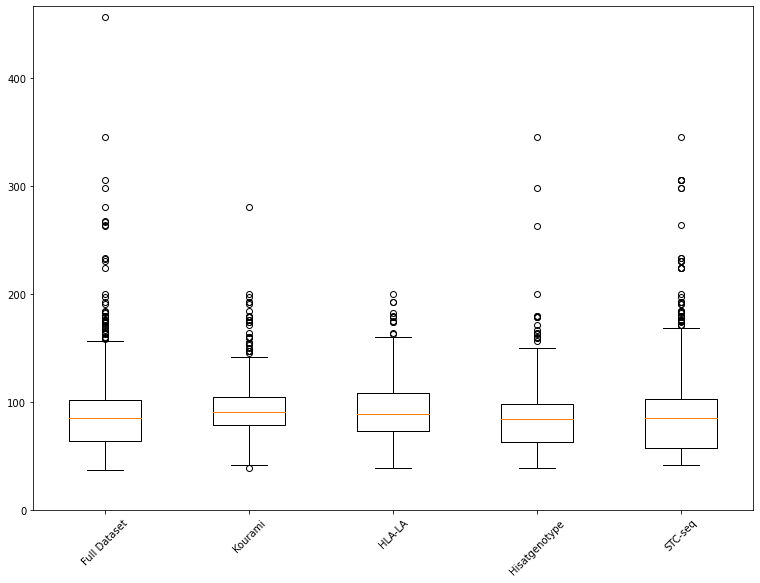

In [26]:
labels_boxplot_hla_II = ['Full Dataset'] + ['Kourami', 'HLA-LA', 'Hisatgenotype', 'STC-seq']

overall_coverage = errors_metadata_hla_II_df['mean_depth'].values
kourami_coverage = kourami_length_dist_df['mean_depth'].values
hla_la_coverage= hla_la_length_dist_df['mean_depth'].values
hisatgenotype_coverage = hisatgenotype_length_dist_df['mean_depth'].values
stc_seq_coverage = stc_seq_length_dist_df['mean_depth'].values
data = [overall_coverage, kourami_coverage, hla_la_coverage, hisatgenotype_coverage, stc_seq_coverage] 
  
    
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
 
# Creating plot 
bp = ax.boxplot(data) 
  
# show plot 
ax.set_xticklabels(labels_boxplot_hla_II, rotation = 45)

ax.set_ylim(0, max(overall_coverage)+10)
 

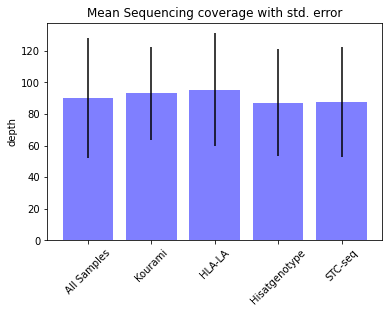

In [27]:
overall_mean = errors_metadata_hla_II_df['mean_depth'].mean()
kourami_mean = kourami_length_dist_df['mean_depth'].mean()
hla_la_mean = hla_la_length_dist_df['mean_depth'].mean()
hisatgenotype_mean = hisatgenotype_length_dist_df['mean_depth'].mean()
stc_seq_mean = stc_seq_length_dist_df['mean_depth'].mean()

mean_values = [overall_mean, kourami_mean, hla_la_mean, hisatgenotype_mean, stc_seq_mean]

overall_std = errors_metadata_hla_II_df['mean_depth'].std()
kourami_std = kourami_length_dist_df['mean_depth'].std()
hla_la_std = hla_la_length_dist_df['mean_depth'].std()
hisatgenotype_std = hisatgenotype_length_dist_df['mean_depth'].std()
stc_seq_std = stc_seq_length_dist_df['mean_depth'].std()

std_values = [overall_std, kourami_std, hla_la_std, hisatgenotype_std, stc_seq_std]

plt.bar(range(5), mean_values, yerr=std_values, align='center', alpha=0.5, color = '#0000FF')

plt.xticks(range(5), ['All Samples'] + list(errors_metadata_hla_II_df.columns[1:5]), rotation = 45)
plt.ylabel('depth')
plt.title('Mean Sequencing coverage with std. error')
plt.show()

# Errors in relation to gender and ethnicity

In [28]:
labels_no_stc = ['Kourami', 'HLA-LA', 'Optitype', 'Hisatgenotype']

errors_metadata_hla_I_df[labels_no_stc+ ['mean_error_graph'] +['Region']].groupby(['Region']).agg([np.mean, np.std]) 

Kourami              HLA-LA            Optitype            \
            mean       std      mean       std      mean       std   
Region                                                               
AFR     1.427807  1.690860  0.288770  0.550691  0.133690  0.473251   
AMR     0.751244  1.139215  0.218905  0.437996  0.104478  0.322537   
EAS     0.950495  1.219641  0.267327  0.487670  0.089109  0.286322   
EUR     1.126471  1.545344  0.261765  0.655593  0.064706  0.290338   

       Hisatgenotype           mean_error_graph            
                mean       std             mean       std  
Region                                                     
AFR         0.524064  0.812012         0.746881  0.778355  
AMR         0.805970  0.892841         0.592040  0.624911  
EAS         0.742574  0.844434         0.653465  0.630557  
EUR         0.638235  0.849263         0.675490  0.807366

In [29]:
labels_no_stc_no_optitype = ['Kourami', 'HLA-LA', 'Hisatgenotype'] 

errors_metadata_hla_II_df[labels_no_stc_no_optitype + ['mean_error_graph'] + ['Region']].groupby(['Region']).agg([np.mean, np.std])

Kourami              HLA-LA           Hisatgenotype            \
            mean       std      mean       std          mean       std   
Region                                                                   
AFR     0.459893  0.824521  0.208556  0.491138      0.459893  0.597707   
AMR     0.318408  0.630959  0.119403  0.340105      0.373134  0.587431   
EAS     1.287129  0.898183  0.247525  0.477618      0.643564  0.715320   
EUR     0.644118  0.858651  0.155882  0.394424      0.441176  0.604368   

       mean_error_graph            
                   mean       std  
Region                             
AFR            0.376114  0.453922  
AMR            0.270315  0.362718  
EAS            0.726073  0.499769  
EUR            0.413725  0.450144

### Overall analysis - mean performance of HISAT-genotype, Kourami and HLA-LA

<AxesSubplot:xlabel='Region'>

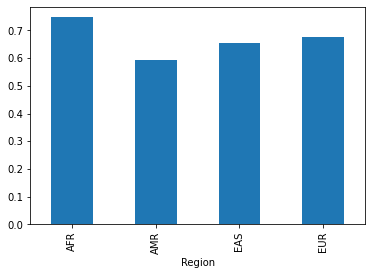

In [30]:
errors_metadata_hla_I_df.groupby('Region')['mean_error_graph'].mean().plot.bar()

<AxesSubplot:xlabel='Region'>

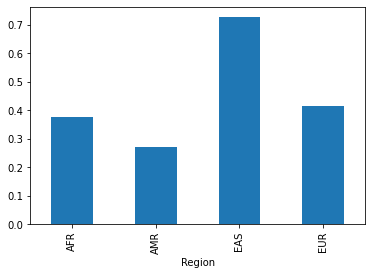

In [31]:
errors_metadata_hla_II_df.groupby('Region')['mean_error_graph'].mean().plot.bar()

<AxesSubplot:xlabel='Population'>

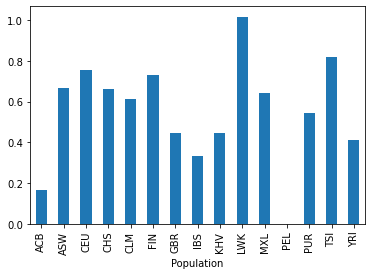

In [32]:
errors_metadata_hla_I_df.groupby('Population')['mean_error_graph'].mean().plot.bar()

<AxesSubplot:xlabel='Population'>

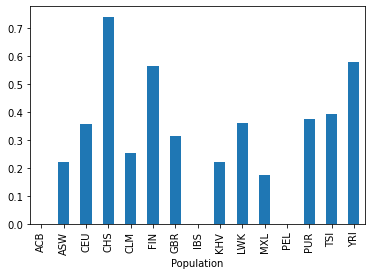

In [33]:
errors_metadata_hla_II_df.groupby('Population')['mean_error_graph'].mean().plot.bar()

In [34]:
errors_metadata_hla_I_df[['mean_error_graph']+['Gender']].groupby(['Gender']).agg([np.mean, np.std])

mean_error_graph          
                   mean       std
Gender                           
female         0.692601  0.762486
male           0.642007  0.714971

In [35]:
errors_metadata_hla_II_df[['mean_error_graph']+['Gender']].groupby(['Gender']).agg([np.mean, np.std])

mean_error_graph          
                   mean       std
Gender                           
female         0.421815  0.441596
male           0.393707  0.472651

<AxesSubplot:xlabel='None,Gender'>

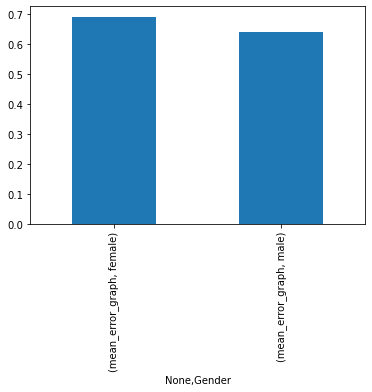

In [36]:
 errors_metadata_hla_I_df[['mean_error_graph']+['Gender']].groupby(['Gender']).mean().unstack().plot(kind='bar')

<AxesSubplot:xlabel='None,Gender'>

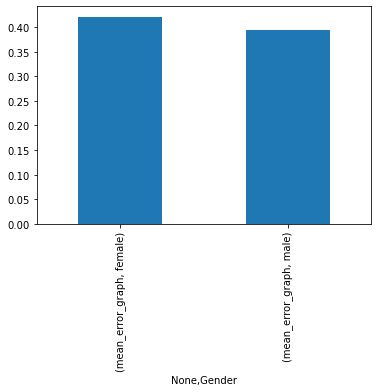

In [37]:
 errors_metadata_hla_II_df[['mean_error_graph']+['Gender']].groupby(['Gender']).mean().unstack().plot(kind='bar')

### Over Kourami, HLA-LA, Optitype and HISAT-genotype individually:

<AxesSubplot:xlabel='None,Region'>

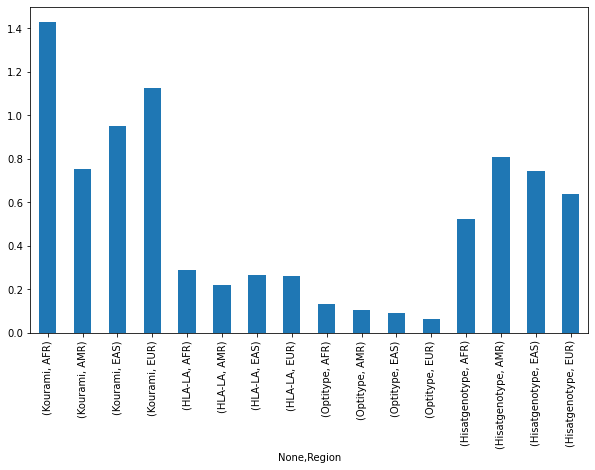

In [38]:
 errors_metadata_hla_I_df[labels_no_stc+['Region']].groupby(['Region']).mean().unstack().plot(kind='bar', figsize = (10,6))

<AxesSubplot:xlabel='None,Region'>

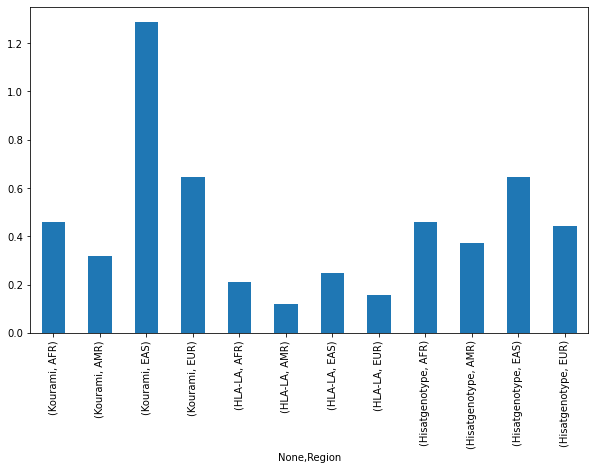

In [39]:
 errors_metadata_hla_II_df[labels_no_stc_no_optitype+['Region']].groupby(['Region']).mean().unstack().plot(kind='bar', figsize = (10,6))

<AxesSubplot:xlabel='None,Population'>

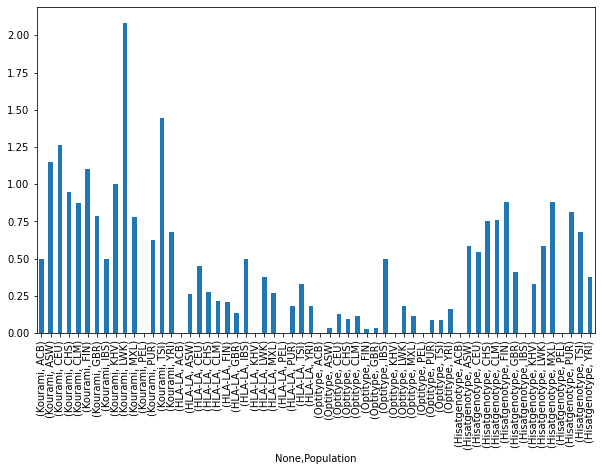

In [40]:
 errors_metadata_hla_I_df[labels_no_stc+['Population']].groupby(['Population']).mean().unstack().plot(kind='bar', figsize = (10,6))

<AxesSubplot:xlabel='None,Population'>

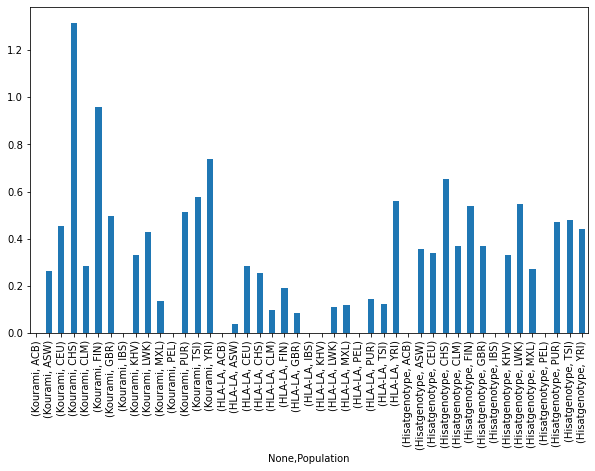

In [41]:
 errors_metadata_hla_II_df[labels_no_stc_no_optitype+['Population']].groupby(['Population']).mean().unstack().plot(kind='bar', figsize = (10,6))

In [42]:
 errors_metadata_hla_I_df[labels_no_stc+['Gender']].groupby(['Gender']).agg([np.mean, np.std])

Kourami              HLA-LA            Optitype            \
            mean       std      mean       std      mean       std   
Gender                                                               
female  1.105263  1.501649  0.258581  0.597741  0.089245  0.381689   
male    1.056122  1.441764  0.257653  0.527933  0.096939  0.304763   

       Hisatgenotype            
                mean       std  
Gender                          
female      0.713959  0.897556  
male        0.612245  0.804497

In [43]:
errors_metadata_hla_II_df[labels_no_stc_no_optitype+['Gender']].groupby(['Gender']).agg([np.mean, np.std])

Kourami              HLA-LA           Hisatgenotype          
            mean       std      mean       std          mean       std
Gender                                                                
female  0.636156  0.860910  0.155606  0.399020      0.473684  0.615077
male    0.563776  0.846847  0.186224  0.439151      0.431122  0.619670

<AxesSubplot:xlabel='None,Gender'>

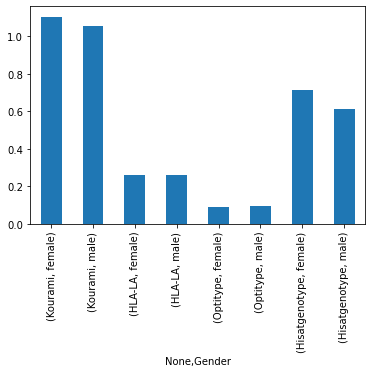

In [44]:
 errors_metadata_hla_I_df[labels_no_stc+['Gender']].groupby(['Gender']).mean().unstack().plot(kind='bar')

<AxesSubplot:xlabel='None,Gender'>

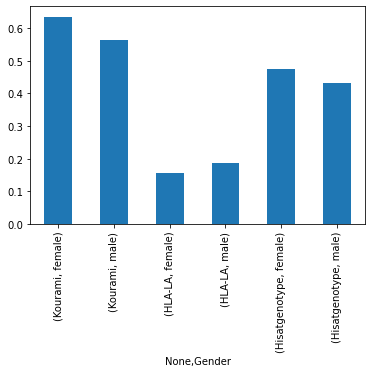

In [45]:
 errors_metadata_hla_II_df[labels_no_stc_no_optitype+['Gender']].groupby(['Gender']).mean().unstack().plot(kind='bar')

## Analysis of variable correlation

In [46]:
errors_metadata_hla_I_df[['mean_depth']+['Region']].groupby(['Region']).mean()

,mean_depth
Region,
AFR,89.625187
AMR,91.793980
EAS,98.274158
EUR,86.585265


Region  AFR  AMR  EAS  EUR
Center                    
BCM      64   23    8  101
BGI       5   30   80  108
BI       48   96   10   84
WUGSC    67   51    3   45


<AxesSubplot:xlabel='Region', ylabel='Center'>

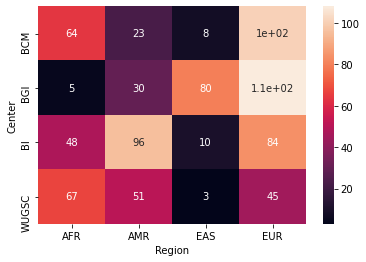

In [47]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

df = pd.DataFrame(errors_metadata_hla_I_df[['Center']+['Region']].groupby(['Center','Region']).size()).unstack()
df.columns = df.columns.droplevel()

print(df)

sns.heatmap(df, annot=True)

# plot_poisson_regression_non_normal_loss
Old one Taken from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html

New one taken from: https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958

In [48]:
df = errors_metadata_hla_I_df
df['mean_error_graph'] = df['mean_error_graph'] * 3

In [49]:
len(errors_metadata_hla_I_df)

829

In [50]:
print(np.mean(df['mean_error_graph']))
print(np.var(df['mean_error_graph']))

2.006031363088058
4.927587265602596


In [51]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [52]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=673
Testing data set length=156


In [53]:
expr = """sum_of_errors ~ mean_depth + mean_depth*tool + Gender + Center + Region + tool + tool*Region"""

In [54]:
expr = """mean_error_graph ~ mean_depth + Population"""

In [55]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [56]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [57]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       mean_error_graph   No. Observations:                  673
Model:                            GLM   Df Residuals:                      657
Model Family:                 Poisson   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1321.9
Date:                Sat, 16 Jan 2021   Deviance:                       1345.9
Time:                        18:16:07   Pearson chi2:                 1.33e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8198      1.03

In [58]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

ValueError: shapes (156,13) and (16,) not aligned: 13 (dim 1) != 16 (dim 0)

In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['mean_error_graph']
fig = plt.figure()
fig.suptitle('Predicted versus actual errors')
predicted, = plt.plot(X_test.index, predicted_counts, 'gx', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'rx', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [ ]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts (errors)')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

## Old log regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer


log_scale_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=False),
    StandardScaler()
)

linear_model_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough",
            ["mean_depth"]),
        ("onehot_categorical", OneHotEncoder(),
            ["Region", "Gender"]),
    ],
    remainder="drop",
)

In [ ]:
    from sklearn.dummy import DummyRegressor
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split

    df_train, df_test = train_test_split(df, test_size=0.33, random_state=0)

    dummy = Pipeline([
        ("preprocessor", linear_model_preprocessor),
        ("regressor", DummyRegressor(strategy='mean')),
    ]).fit(df_train, df_train["mean_error_graph"])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance


def score_estimator(estimator, df_test):
    """Score an estimator on the test set."""
    y_pred = estimator.predict(df_test)

    print("MSE: %.3f" %
          mean_squared_error(df_test["mean_error_graph"], y_pred))
    print("MAE: %.3f" %
          mean_absolute_error(df_test["mean_error_graph"], y_pred))

    # Ignore non-positive predictions, as they are invalid for
    # the Poisson deviance.
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(f"WARNING: Estimator yields invalid, non-positive predictions "
              f" for {n_masked} samples out of {n_samples}. These predictions "
              f"are ignored when computing the Poisson deviance.")

    print("mean Poisson deviance: %.3f" %
          mean_poisson_deviance(df_test["mean_error_graph"][mask], y_pred[mask]))


print("Constant mean frequency evaluation:")
score_estimator(dummy, df_test)

In [ ]:
from sklearn.linear_model import Ridge


ridge_glm = Pipeline([
    ("preprocessor", linear_model_preprocessor),
    ("regressor", Ridge(alpha=1e-6)),
]).fit(df_train, df_train["mean_error_graph"])

print("Ridge evaluation:")
score_estimator(ridge_glm, df_test)

In [ ]:
from sklearn.linear_model import PoissonRegressor

n_samples = df_train.shape[0]

poisson_glm = Pipeline([
    ("preprocessor", linear_model_preprocessor),
    ("regressor", PoissonRegressor(alpha=1e-12, max_iter=300))
])
poisson_glm.fit(df_train, df_train["mean_error_graph"])

print("PoissonRegressor evaluation:")
score_estimator(poisson_glm, df_test)

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder


tree_preprocessor = ColumnTransformer(
    [
        ("categorical", OrdinalEncoder(),
            ["Region", "Gender"]),
        ("numeric", "passthrough",
            ["mean_depth"]),
    ],
    remainder="drop",
)
poisson_gbrt = Pipeline([
    ("preprocessor", tree_preprocessor),
    ("regressor", HistGradientBoostingRegressor(loss="poisson",
                                                max_leaf_nodes=128)),
])
poisson_gbrt.fit(df_train, df_train["mean_error_graph"])

print("Poisson Gradient Boosted Trees evaluation:")
score_estimator(poisson_gbrt, df_test)

In [ ]:
df

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), sharey=True)
fig.subplots_adjust(bottom=0.2)
n_bins = 20
for row_idx, label, df in zip(range(2),
                              ["train", "test"],
                              [df_train, df_test]):
    df["mean_error_graph"].hist(bins=np.linspace(-1, 6, n_bins),
                         ax=axes[row_idx, 0])

    axes[row_idx, 0].set_title("Data")
    axes[row_idx, 0].set_yscale('linear')
    axes[row_idx, 0].set_xlabel("y (observed mean_error_graph)")
    axes[row_idx, 0].set_ylim([1, 1000])
    axes[row_idx, 0].set_ylabel(label + " samples")

    for idx, model in enumerate([ridge_glm, poisson_glm, poisson_gbrt]):
        y_pred = model.predict(df)

        pd.Series(y_pred).hist(bins=np.linspace(-1, 4, n_bins),
                               ax=axes[row_idx, idx+1])
        axes[row_idx, idx + 1].set(
            title=model[-1].__class__.__name__,
            yscale='log',
            xlabel="y_pred (predicted expected mean_error_graph)"
        )
plt.tight_layout()

In [ ]:
from sklearn.utils import gen_even_slices

def _mean_frequency_by_risk_group(y_true, y_pred, sample_weight=None,
                                  n_bins=100):
    """Compare predictions and observations for bins ordered by y_pred.

    We order the samples by ``y_pred`` and split it in bins.
    In each bin the observed mean is compared with the predicted mean.

    Parameters
    ----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,)
        Sample weights.
    n_bins: int
        Number of bins to use.

    Returns
    -------
    bin_centers: ndarray of shape (n_bins,)
        bin centers
    y_true_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    y_pred_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    """
    idx_sort = np.argsort(y_pred)
    bin_centers = np.arange(0, 1, 1/n_bins) + 0.5/n_bins
    y_pred_bin = np.zeros(n_bins)
    y_true_bin = np.zeros(n_bins)

    for n, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
        y_pred_bin[n] = np.average(
            y_pred[idx_sort][sl]
        )
        y_true_bin[n] = np.average(
            y_true[idx_sort][sl]
        )
    return bin_centers, y_true_bin, y_pred_bin


print(f"Actual number of claims: {df_test['mean_error_graph'].sum()}")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3)

for axi, model in zip(ax.ravel(), [ridge_glm, poisson_glm, poisson_gbrt,
                                   dummy]):
    y_pred = model.predict(df_test)
    y_true = df_test["mean_error_graph"].values
    q, y_true_seg, y_pred_seg = _mean_frequency_by_risk_group(
        y_true, y_pred, n_bins=10)

    # Name of the model after the estimator used in the last step of the
    # pipeline.
    print(f"Predicted number of claims by {model[-1]}: "
          f"{np.sum(y_pred):.1f}")

    axi.plot(q, y_pred_seg, marker='x', linestyle="--", label="predictions")
    axi.plot(q, y_true_seg, marker='o', linestyle="--", label="observations")
    axi.set_xlim(0, 1)
    axi.set_ylim(0, 2)
    axi.set(
        title=model[-1],
        xlabel='Fraction of samples sorted by y_pred',
        ylabel='Mean Frequency (y_pred)'
    )
    axi.legend()
plt.tight_layout()